# Productivity Prediction of Garment Employees

### Overview

The Garment Industry is one of the key examples of the industrial globalization of this modern era. It is a highly labour-intensive industry with lots of manual processes. Satisfying the huge global demand for garment products is mostly dependent on the production and delivery performance of the employees in the garment manufacturing companies. So, it is highly desirable among the decision makers in the garments industry to track, analyse and predict the productivity performance of the working teams in their factories.

This dataset can be used for regression purpose by predicting the productivity range (0-1) or for classification purpose by transforming the productivity range (0-1) into different classes.



# Data Undertanding

In [1]:
# Ignore warnings
import warnings

warnings.simplefilter(action = "ignore", category = FutureWarning)

# import the necessary Python libraries Numpy, Pandas and Matplotlib with their usual shorthand notation.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [2]:
# load dataset 
# Import and read dataset
df = pd.read_csv('garments_worker_productivity.csv')
df.head(5)

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


In [3]:
df.columns

Index(['date', 'quarter', 'department', 'day', 'team', 'targeted_productivity',
       'smv', 'wip', 'over_time', 'incentive', 'idle_time', 'idle_men',
       'no_of_style_change', 'no_of_workers', 'actual_productivity'],
      dtype='object')

## Statistical Decriptive

In [4]:
# Informasi Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

In [5]:
numerical = df.select_dtypes(include=[np.number])
numerical.columns

Index(['team', 'targeted_productivity', 'smv', 'wip', 'over_time', 'incentive',
       'idle_time', 'idle_men', 'no_of_style_change', 'no_of_workers',
       'actual_productivity'],
      dtype='object')

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
team,1197.0,6.426901,3.463963,1.000000,3.000000,6.000000,9.000000,12.000000
targeted_productivity,1197.0,0.729632,0.097891,0.070000,0.700000,0.750000,0.800000,0.800000
smv,1197.0,15.062172,10.943219,2.900000,3.940000,15.260000,24.260000,54.560000
wip,691.0,1190.465991,1837.455001,7.000000,774.500000,1039.000000,1252.500000,23122.000000
over_time,1197.0,4567.460317,3348.823563,0.000000,1440.000000,3960.000000,6960.000000,25920.000000
incentive,1197.0,38.210526,160.182643,0.000000,0.000000,0.000000,50.000000,3600.000000
idle_time,1197.0,0.730159,12.709757,0.000000,0.000000,0.000000,0.000000,300.000000
idle_men,1197.0,0.369256,3.268987,0.000000,0.000000,0.000000,0.000000,45.000000
no_of_style_change,1197.0,0.150376,0.427848,0.000000,0.000000,0.000000,0.000000,2.000000
no_of_workers,1197.0,34.609858,22.197687,2.000000,9.000000,34.000000,57.000000,89.000000


In [7]:
categorical = df.select_dtypes(exclude=[np.number])
categorical.columns

Index(['date', 'quarter', 'department', 'day'], dtype='object')

In [8]:
categorical.describe().T

,count,unique,top,freq
date,1197,59,3/11/2015,24
quarter,1197,5,Quarter1,360
department,1197,3,sweing,691
day,1197,6,Wednesday,208


In [9]:
for i in categorical:
  print('-----'*10)
  print(i)
  print(df[i].value_counts())

--------------------------------------------------
date
3/11/2015    24
1/31/2015    24
1/11/2015    23
3/10/2015    23
1/12/2015    23
1/24/2015    23
1/8/2015     22
1/10/2015    22
1/7/2015     22
1/13/2015    22
1/5/2015     22
3/9/2015     22
3/8/2015     22
3/3/2015     22
1/22/2015    22
2/25/2015    21
2/26/2015    21
2/28/2015    21
1/3/2015     21
1/4/2015     21
1/28/2015    21
1/27/2015    21
3/4/2015     21
1/25/2015    21
1/17/2015    21
1/14/2015    21
1/6/2015     21
2/18/2015    21
1/29/2015    20
2/17/2015    20
3/2/2015     20
3/1/2015     20
2/22/2015    20
2/19/2015    20
3/5/2015     19
3/7/2015     19
2/24/2015    19
2/23/2015    19
1/1/2015     19
2/3/2015     19
2/15/2015    19
1/15/2015    19
1/18/2015    19
1/19/2015    19
1/21/2015    19
1/26/2015    19
2/1/2015     19
2/2/2015     19
2/4/2015     19
2/7/2015     19
2/8/2015     19
2/10/2015    19
2/11/2015    19
2/12/2015    19
2/5/2015     18
2/9/2015     18
2/16/2015    18
2/14/2015    17
1/20/2015    15


In [10]:
df=df.replace(['finishing '], ['finishing'])  
df.department.value_counts()

sweing       691
finishing    506
Name: department, dtype: int64

Teradapat kesalahan penulisan untuk department finisihing, untuk itu harus replace dengan value yang benar

## Univariate Analysis

### Target vs Actual Productivity

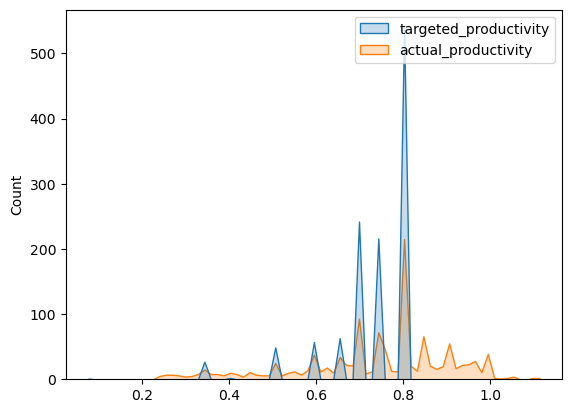

In [11]:
#Compare targeted_productivity and actual_productivity
sns.histplot(data=df[['targeted_productivity', 'actual_productivity']], element='poly')
plt.show()

Terdapat lebih dari 500 kali dengan produktivitas kurang lebih 0.8 

### Actual & Targeted Productivity over Time

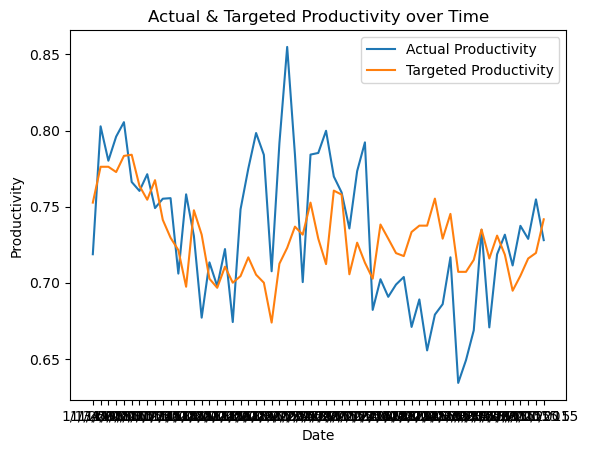

In [12]:
# Plot the actual productivity
sns.lineplot(data=df, x="date", y="actual_productivity", ci=None, label="Actual Productivity")

# Plot the targeted productivity
sns.lineplot(data=df, x="date", y="targeted_productivity", ci=None, label="Targeted Productivity")

# Set the labels and title
plt.xlabel('Date')
plt.ylabel('Productivity')
plt.title('Actual & Targeted Productivity over Time')

# Show the legend
plt.legend()

# Show the plot
plt.show()

Dalam kurun waktu tersebut, dapat dilihat bahwa lebih banyak tingkat produksi yang melebihi target daripada produksi yang dibawah target

### Actual Productivity of Teams in Each Department

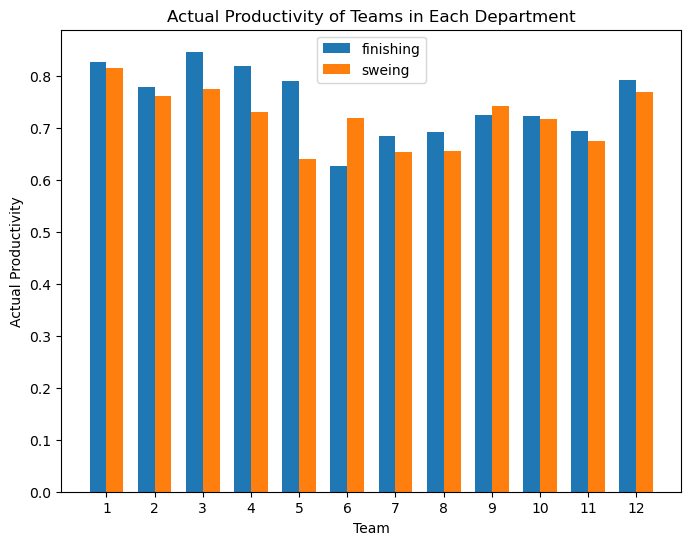

In [13]:
# Group the DataFrame by department and team, and calculate the average actual productivity
team_productivity = df.groupby(['department', 'team'])['actual_productivity'].mean().reset_index()

# Get the unique departments and teams
departments = team_productivity['department'].unique()
teams = team_productivity['team'].unique()
num_teams = len(teams)

# Set the figure size
plt.figure(figsize=(8, 6))

# Set the width of each bar
bar_width = 0.35

# Set the positions of the bars on the x-axis
r1 = np.arange(num_teams)
r2 = [x + bar_width for x in r1]

# Iterate over each department
for i, department in enumerate(departments):
    # Filter the team productivity for the current department
    department_productivity = team_productivity[team_productivity['department'] == department]

    # Create a bar chart for the actual productivity of teams in the current department
    plt.bar(r1 + (i * bar_width), department_productivity['actual_productivity'], width=bar_width, label=department)

# Set the x-axis labels and tick positions
plt.xlabel('Team')
plt.ylabel('Actual Productivity')
plt.title('Actual Productivity of Teams in Each Department')
plt.xticks([r + bar_width / 2 for r in range(num_teams)], teams)
plt.legend()

# Show the plot
plt.show()

10 dari 12 tim yang ada, department finishing menghasilkan produktivitas lebih tinggi dari pada department sewing

### Overtime & Incentive by Department with Boxplot

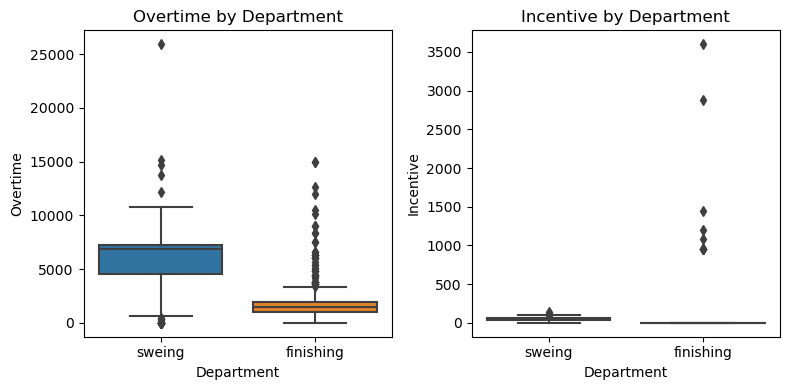

In [14]:
# Set the figure size
plt.figure(figsize=(8, 4))

# Create subplots for overtime and incentive
plt.subplot(1, 2, 1)
sns.boxplot(x='department', y='over_time', data=df)
plt.xlabel('Department')
plt.ylabel('Overtime')
plt.title('Overtime by Department')

plt.subplot(1, 2, 2)
sns.boxplot(x='department', y='incentive', data=df)
plt.xlabel('Department')
plt.ylabel('Incentive')
plt.title('Incentive by Department')

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

Department finisihing terdapat kerja overtime lebih banyak dari pada seharusnya.
Department Sewing lebih sering bekerja overtime.
Department sewing terdapat 1 kali kerja overtime lebih dari 25.000 menit

Namun, department sewing lebih sedikit kemungkinan untuk mendapat insentif dari bekerja overtime tersebut, sedangkan department finisihing dapat insentif yang banyak untuk beberapa saat.

### Average Incentive and Overtime by Team and Department

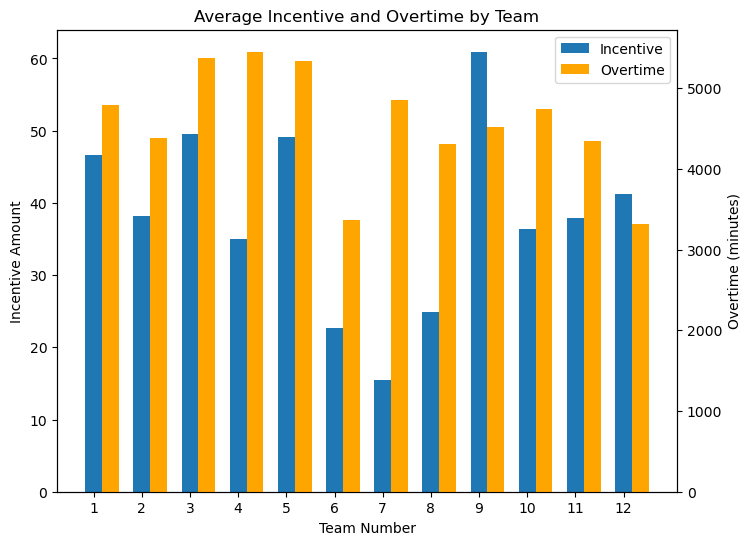

In [15]:
# Group the filtered DataFrame by department and team number, and calculate the mean values for incentive and overtime
grouped_df = df.groupby(['team']).mean().reset_index()

# Create the bar chart for incentive using Matplotlib
fig, ax = plt.subplots(figsize=(8, 6))
width = 0.35  # Width of the bars

teams = grouped_df['team']
incentives = grouped_df['incentive']

bar1 = ax.bar(teams, incentives, width, label='Incentive')

ax.set_xlabel('Team Number')
ax.set_ylabel('Incentive Amount')
ax.set_title('Average Incentive and Overtime by Team')
ax.set_xticks(teams)
ax.set_xticklabels(teams)
ax.legend()

# Create the bar chart for overtime using Matplotlib
ax2 = ax.twinx()  # Create a secondary y-axis for overtime
overtime = grouped_df['over_time']

bar2 = ax2.bar(teams + width, overtime, width, label='Overtime', color='orange')

ax2.set_ylabel('Overtime (minutes)')

# Set the legend for both bar charts
bars = [bar1, bar2]
labels = [bar.get_label() for bar in bars]
ax.legend(bars, labels)

plt.show()

Dari semua tim, hanya tim 9 yang mendapat insentif yang banyak dari waktu bekerja saat overtime, sisanya tim mendapat upah insentif yang lebih sedikit dari jumlah waktu bekerja overtime.

### Total Incentive and Overtime - Department

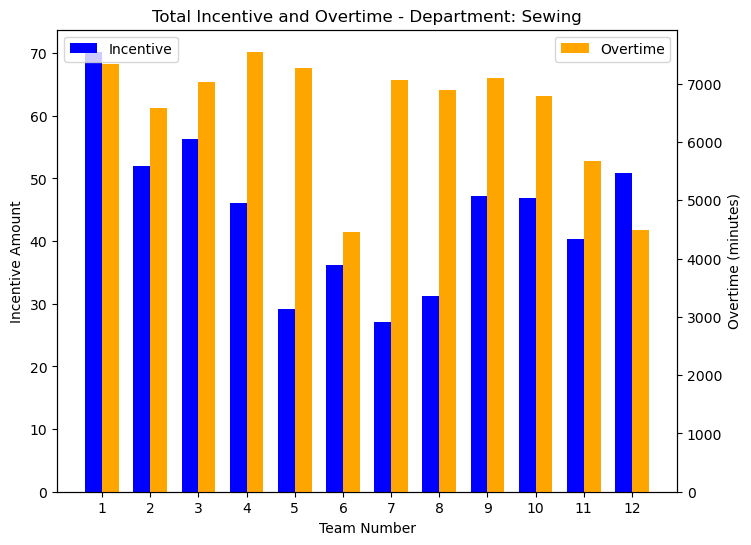

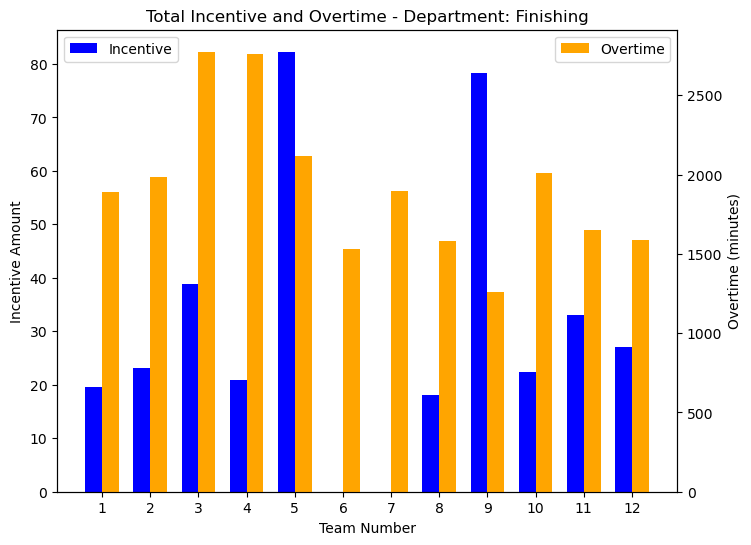

In [16]:
# Group the DataFrame by department, team number, and calculate the sum of incentives and overtime
grouped_df = df.groupby(['department', 'team']).mean().reset_index()

# Separate data for each department
department1 = 'sweing'
department2 = 'finishing'
department1_df = grouped_df[grouped_df['department'] == department1]
department2_df = grouped_df[grouped_df['department'] == department2]

# Create the figure and axes for Department 1 (Sewing)
fig, ax1 = plt.subplots(figsize=(8, 6))
ax2 = ax1.twinx()

# Incentive bar chart for Department 1
teams1 = department1_df['team']
incentives1 = department1_df['incentive']
overtime1 = department1_df['over_time']
bar_width = 0.35

ax1.bar(teams1 - bar_width/2, incentives1, width=bar_width, label='Incentive', color='blue')
ax1.set_xlabel('Team Number')
ax1.set_ylabel('Incentive Amount')
ax1.set_title('Total Incentive and Overtime - Department: Sewing')

# Overtime bar chart for Department 1
ax2.bar(teams1 + bar_width/2, overtime1, width=bar_width, label='Overtime', color='orange')
ax2.set_ylabel('Overtime (minutes)')

# Adjust the x-axis tick positions and labels for Department 1
ax1.set_xticks(teams1)
ax1.set_xticklabels(teams1)

# Set the legend for both charts in Department 1
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Display the chart for Department 1
plt.show()

# Create the figure and axes for Department 2 (Finishing)
fig, ax1 = plt.subplots(figsize=(8, 6))
ax2 = ax1.twinx()

# Incentive bar chart for Department 2
teams2 = department2_df['team']
incentives2 = department2_df['incentive']
overtime2 = department2_df['over_time']

ax1.bar(teams2 - bar_width/2, incentives2, width=bar_width, label='Incentive', color='blue')
ax1.set_xlabel('Team Number')
ax1.set_ylabel('Incentive Amount')
ax1.set_title('Total Incentive and Overtime - Department: Finishing')

# Overtime bar chart for Department 2
ax2.bar(teams2 + bar_width/2, overtime2, width=bar_width, label='Overtime', color='orange')
ax2.set_ylabel('Overtime (minutes)')

# Adjust the x-axis tick positions and labels for Department 2
ax1.set_xticks(teams2)
ax1.set_xticklabels(teams2)

# Set the legend for both charts in Department 2
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Display the chart for Department 2
plt.show()

Setelah dibagi per department, terdapat 4 tim yang mendapat insentif lebih dari waktu bekerja overtime, yaitu:
- Tim 1 dan 12 pada department Sewing.
- Tim 5 dan 9 pada department Finishing.

### Target Achievement Rate by Team

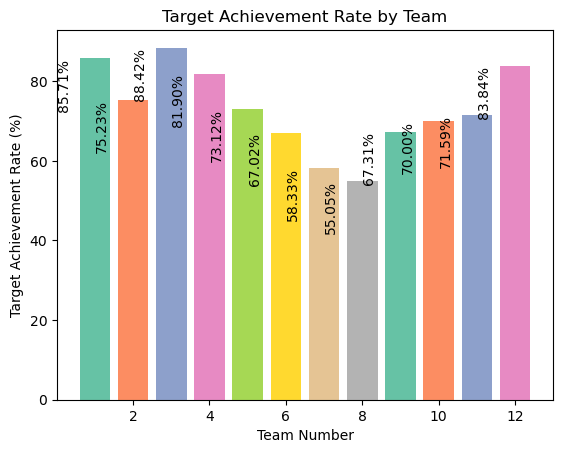

In [17]:
# Create a new column to indicate if the target was achieved
df['target_achieved'] = df['actual_productivity'] >= df['targeted_productivity']

# Calculate the percentage of days where the target was achieved for each team
team_target_achievement_rate = df.groupby('team')['target_achieved'].mean() * 100

# Define a custom color palette
colors = sns.color_palette('Set2')

# Visualize the target achievement rate by team with a custom color palette
plt.bar(team_target_achievement_rate.index, team_target_achievement_rate.values, color=colors)
plt.xlabel('Team Number')
plt.ylabel('Target Achievement Rate (%)')
plt.title('Target Achievement Rate by Team')

# Add value annotations inside the bars
for i, rate in enumerate(team_target_achievement_rate.values):
    plt.text(i, rate, f'{rate:.2f}%', ha='left', va='top', rotation='vertical')


# Show the plot
plt.show()

Tim 3 Menjadi tim dengan persentase produksi melebihi target tertinggi dengan 88.42%, dan tim 8 menjadi yang terendah hanya 55,05%

### Target Achievement Rate by Team and Department

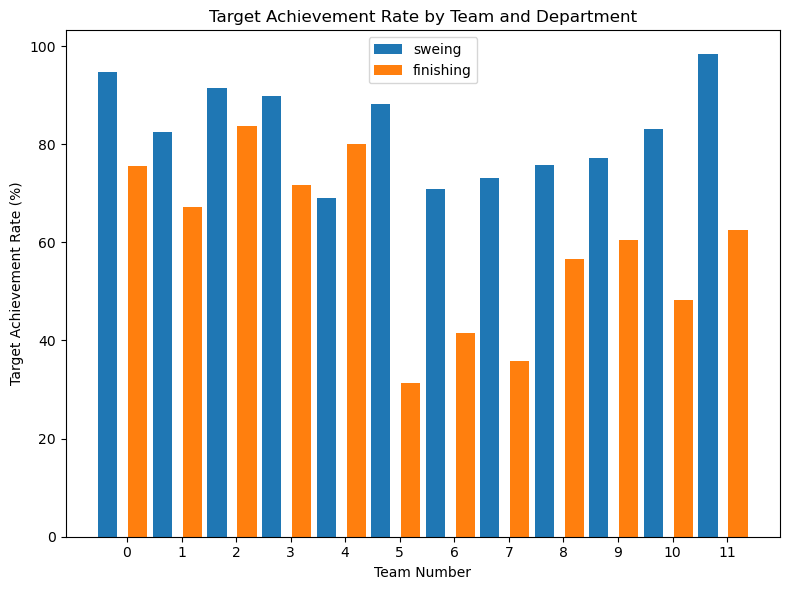

In [18]:
# Calculate the percentage of days where the target was achieved for each team in every department
team_department_target_achievement_rate = df.groupby(['team', 'department'])['target_achieved'].mean() * 100

# Get the unique departments
departments = df['department'].unique()

# Set the number of teams
num_teams = df['team'].nunique()

# Set the width of each bar
bar_width = 0.35

# Set the spacing between each group of bars
spacing = 0.2

# Calculate the total width of each group
total_width = bar_width + spacing

# Create the x-axis positions for each department's bars
x = range(num_teams)

# Create subplots for each department
fig, ax = plt.subplots(figsize=(8, 6))

# Iterate over each department
for i, department in enumerate(departments):
    # Get the target achievement rate for teams in the current department
    department_teams = team_department_target_achievement_rate.loc[:, department]
    
    # Calculate the offset for the current department's bars
    offset = total_width * i
    
    # Create the bar chart for the target achievement rate by team within the current department
    ax.bar([xi + offset for xi in x], department_teams, bar_width, label=department)
    
ax.set_xlabel('Team Number')
ax.set_ylabel('Target Achievement Rate (%)')
ax.set_title('Target Achievement Rate by Team and Department')
ax.set_xticks([xi + bar_width * len(departments)/2 for xi in x])
ax.set_xticklabels(x)
ax.legend(departments)

plt.tight_layout()
plt.show()

Meskipun banyak perkerjaan yang overtime dengan insentif yang sedikit, department sewing memiliki persentase menyelesaikan target lebih tinggi dari department finishing.

Hal ini membuktikan bahwa dengan insentif rendah sedangkan overtime yang tinggi, karyawan masih dapat menyelesaikan pekerjaan sesuai dengan target

### Number of Workers and Achievement Rate in Each Team Every Department

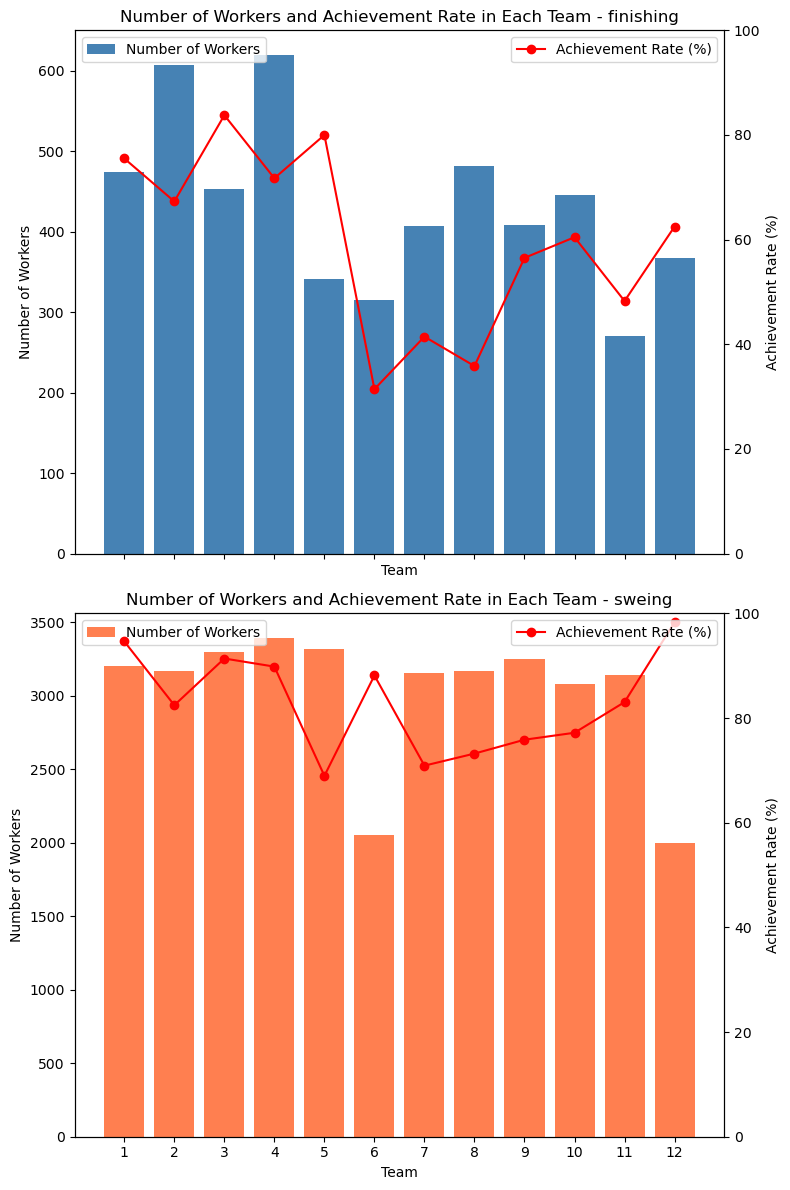

In [19]:
# Group the DataFrame by department and team, and calculate the number of workers and the achievement rate in each team
team_stats = df.groupby(['department', 'team']).agg({'no_of_workers': 'sum', 'target_achieved': 'mean'}).reset_index()

# Set the departments and teams as the x-axis labels
departments = team_stats['department'].unique()
teams = team_stats['team'].unique()
x = np.arange(len(teams))

# Set the colors for each department
colors = ['steelblue', 'coral', 'limegreen', 'gold']

# Create subplots for each department
fig, axes = plt.subplots(len(departments), 1, figsize=(8, 6 * len(departments)), sharex=True)

# Iterate over each department
for i, department in enumerate(departments):
    # Filter the team statistics for the current department
    department_stats = team_stats[team_stats['department'] == department]

    # Set the subplot for the current department
    ax = axes[i]

    # Create the bar chart for the number of workers in each team within the current department
    ax.bar(x, department_stats['no_of_workers'], color=colors[i], label='Number of Workers')
    ax.set_xlabel('Team')
    ax.set_ylabel('Number of Workers')
    ax.set_title(f'Number of Workers and Achievement Rate in Each Team - {department}')
    ax.set_xticks(x)
    ax.set_xticklabels(teams)

    # Create a twin axis for the achievement rate
    ax2 = ax.twinx()
    ax2.plot(x, department_stats['target_achieved'] * 100, color='red', marker='o', linestyle='-', label='Achievement Rate (%)')
    ax2.set_ylabel('Achievement Rate (%)')

    # Adjust the y-axis limits for the achievement rate
    ax2.set_ylim([0, 100])

    # Show legend
    ax.legend(loc='upper left')
    ax2.legend(loc='upper right')

# Adjust the layout
plt.tight_layout()
plt.show()

Sebagian besar karyawan berada di department Sewing, terdapat beberapa tim yang bekerja dengan jumlah yang lebih sedikit, namun dapat memberikan persentase melebihi target yang tinggi.

meskipun jumlah karyawan pada department finishing lebih sedikit, hanya sedikit tim yang mencapai persentase target 80%

### Work in progress distribution with box plot

<AxesSubplot:xlabel='department', ylabel='wip'>

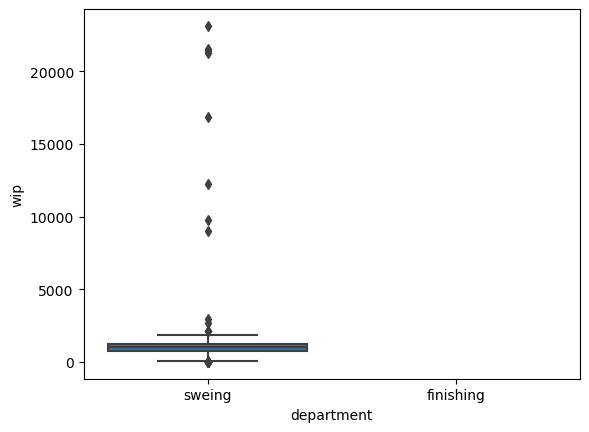

In [20]:
sns.boxplot(x='department',y='wip',data=df)

Work in progres hanya ada pada department sewing, karena untuk melakukan finishing harus menyelesaikan tahapan sewing terlebih dahulu.

Terdapat data null pada fitur ini, dan semua null value nya ada pada department finishing. Pada tahapan preprocessing, null value pada wip akan diganti dengan 0.

### Proportion of Days and teams

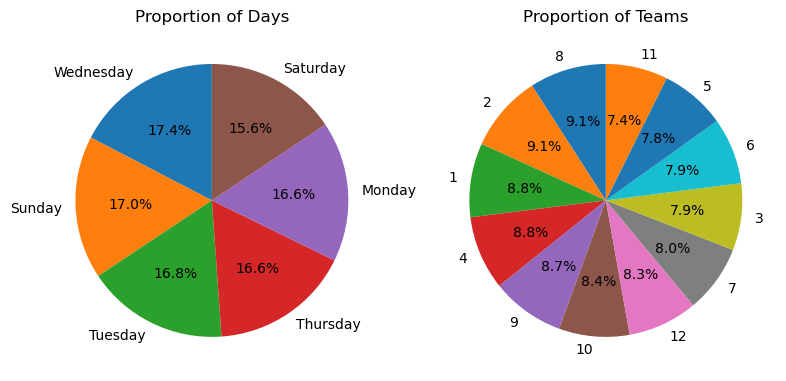

In [21]:
# Calculate the proportion of days
day_proportions = df['day'].value_counts(normalize=True)

# Calculate the proportion of teams
team_proportions = df['team'].value_counts(normalize=True)

# Create subplots for the pie charts
fig, axes = plt.subplots(1, 2, figsize=(8, 5))

# Plot the pie chart for day proportions
axes[0].pie(day_proportions, labels=day_proportions.index, autopct='%1.1f%%', startangle=90)
axes[0].set_title('Proportion of Days')

# Plot the pie chart for team proportions
axes[1].pie(team_proportions, labels=team_proportions.index, autopct='%1.1f%%', startangle=90)
axes[1].set_title('Proportion of Teams')

# Set aspect ratio to be equal for both pie charts
axes[0].set_aspect('equal')
axes[1].set_aspect('equal')

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

- Berikut proporsi hari bekerja dalam kurun waktu januari-maret, dengan hari rabu menjadi hari kerja paling banyak.
- Dan untuk proporsi jumlah tim, paling banyak di tim 2 dan 8.

### Numerical Features Distribution

In [22]:
num = ['team', 'targeted_productivity', 'smv', 'wip', 'over_time', 'incentive',
       'idle_time', 'idle_men', 'no_of_style_change', 'no_of_workers',
       'actual_productivity']

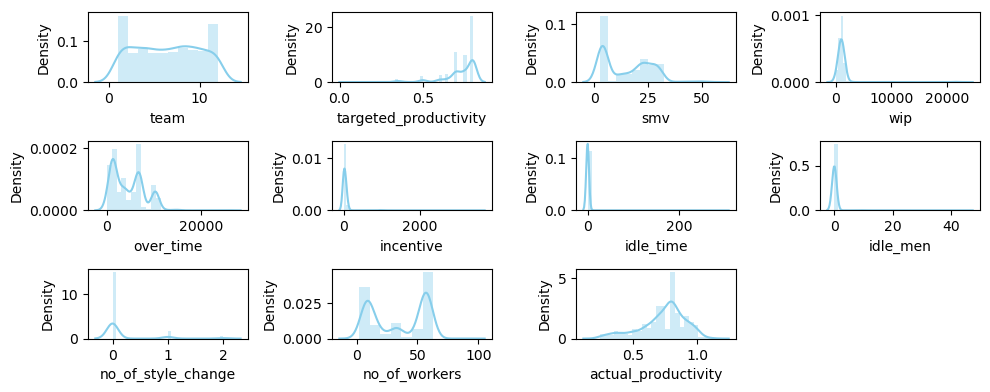

In [23]:
plt.figure(figsize=(10,10))
for i in range(0, len(num)):
    plt.subplot(8, 4, i+1)
    sns.distplot(x=df[num[i]], color='skyblue')
    plt.xlabel(num[i])
    plt.tight_layout()

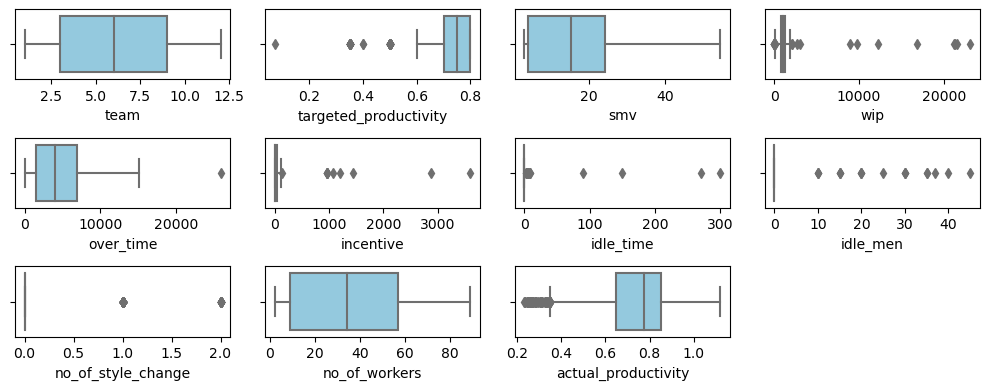

In [24]:
plt.figure(figsize=(10,10))
for i in range(0, len(num)):
    plt.subplot(8, 4, i+1)
    sns.boxplot(x=df[num[i]], color='skyblue')
    plt.xlabel(num[i])
    plt.tight_layout()

## Multivariate Analysis

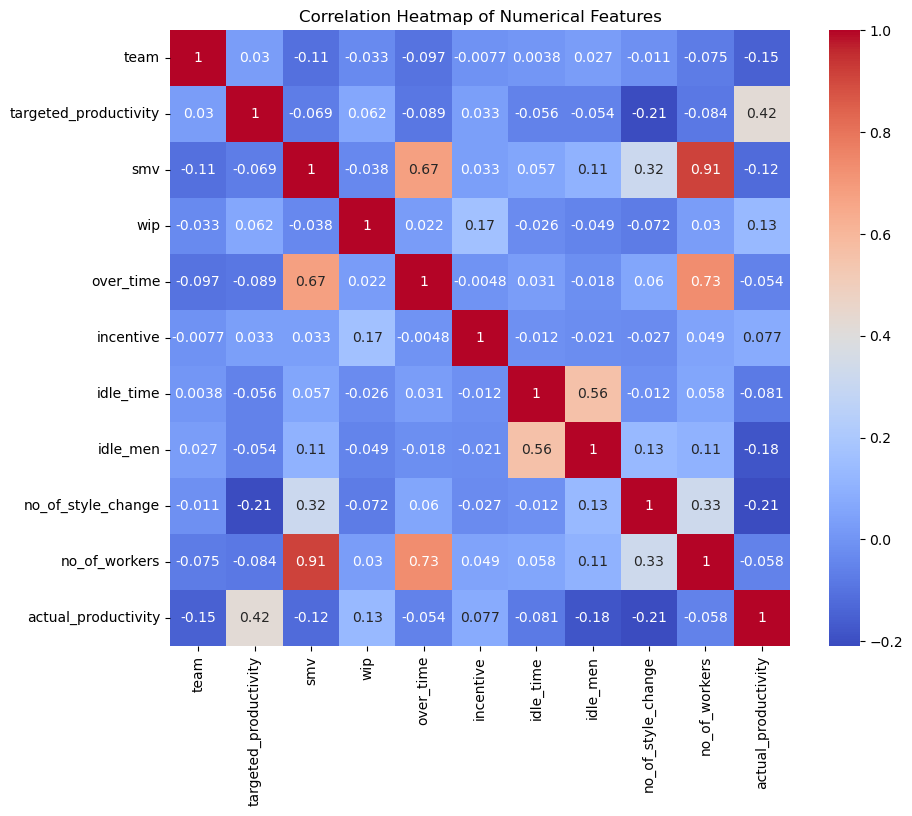

In [25]:
numerical_corr_matrix = df[num].corr()
plt.subplots(figsize=(10, 8))

sns.heatmap(numerical_corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

- Terdapat 3 fitur yang saling berkorelasi tinggi, yaitu no_of_worker dengan smv sebesar 0.91, dan no_of_worker dengan overtime sebesar 0.73.
-  Kita harus Remove Multicolliear Features, dilihat dari mana fitur yang berkorelasi paling tinggi dengan target data.

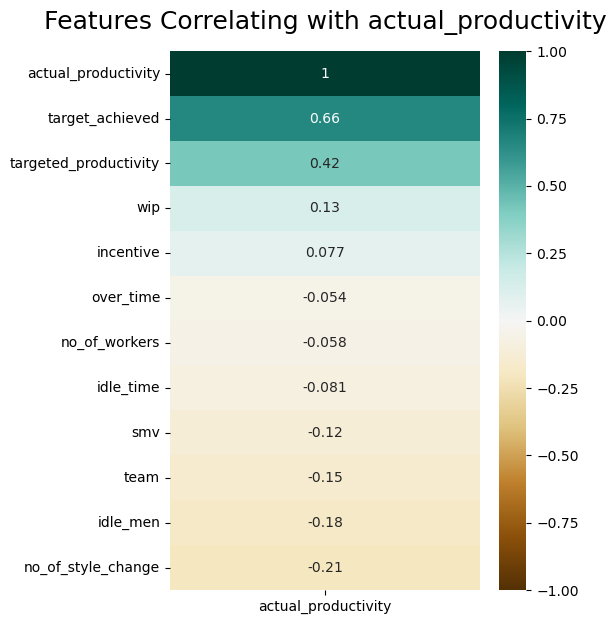

In [26]:
#Correlation between actual productivity and all features
corrMatrix = df.corr()

plt.figure(figsize=(5, 7))
heatmap = sns.heatmap(corrMatrix[['actual_productivity']].sort_values(by='actual_productivity', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with actual_productivity', fontdict={'fontsize':18}, pad=16);

Dari 3 fitur yang saling berkorelasi (smv, no_of_worker, overtime) yang berkorelasi paling rendah dengan target yaitu no_of_worker dan overtime.

### scatter plot over_time vs incentive by department

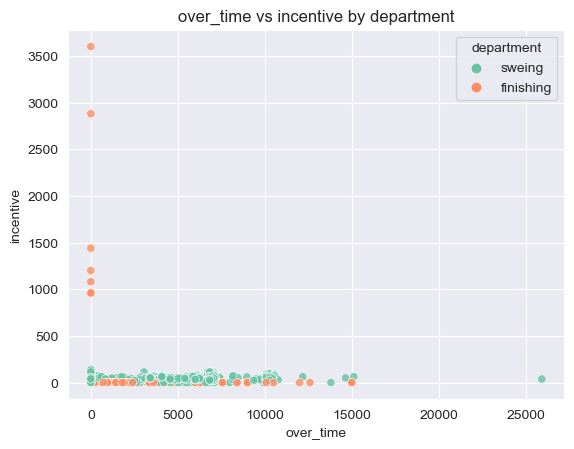

In [27]:
# Set style
sns.set_style("darkgrid")
#Create scatter plot with custom markers, colors, and alpha
sns.scatterplot(x="over_time", y="incentive", 
                data=df, 
                hue="department",
#                 style="Contract",
                markers=["o", "s", "D"],
                palette="Set2",
                alpha=0.8)

# Set title and axis labels
plt.title("over_time vs incentive by department")
plt.xlabel("over_time")
plt.ylabel("incentive")

# Show plot
plt.show()

Dapat dilihat persebaran data untuk insentif dan overtime, department sewing mendapat lebih banyak overtime dibandingkan department finisihing. Akan tetapi perusahaan tidak memberikan apresiasi berupa insentif yang cukup terhadap department sewing yang telah memberikan persentase melaupaui target yang bahkan lebih tinggi dari department finisihing.

### Scatter plot actual_productivity vs no_of_workers by department

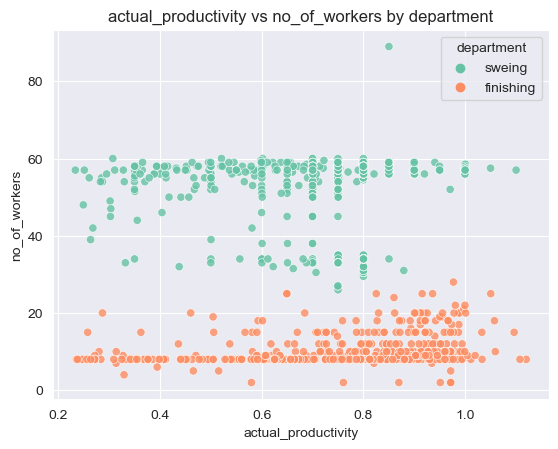

In [28]:
# Set style
sns.set_style("darkgrid")
#Create scatter plot with custom markers, colors, and alpha
sns.scatterplot(x="actual_productivity", y="no_of_workers", 
                data=df, 
                hue="department",
#                 style="Contract",
                markers=["o", "s", "D"],
                palette="Set2",
                alpha=0.8)

# Set title and axis labels
plt.title("actual_productivity vs no_of_workers by department")
plt.xlabel("actual_productivity")
plt.ylabel("no_of_workers")

# Show plot
plt.show()

Dapat dilihat persebaran data dari jumlah pekerja dan actual productivity, 
- pekerja di department finisihing lebih sedikit, namun dengan jumlah yang kurang lebih sama department finishing menghasilkan actual productivity yang beragam mulai dari produktivitas tinggi hingga rendah.
- Pekerja di department sewing lebih banyak dan actual productivity yang dihasilkan banyak berada di sekitar 0.6-0.8 

In [29]:
# Calculate the average actual productivity by department
department_avg_productivity = df.groupby('department')['actual_productivity'].mean()

# Display the average actual productivity by department
for department, productivity in department_avg_productivity.items():
    print(f"Department: {department}, Average Actual Productivity: {productivity:.4f}")

print()
# Calculate the average actual productivity by department
department_avg_productivity = df.groupby('department')['targeted_productivity'].mean()

# Display the average actual productivity by department
for department, productivity in department_avg_productivity.items():
    print(f"Department: {department}, Average targeted_productivity: {productivity:.4f}")

Department: finishing, Average Actual Productivity: 0.7530
Department: sweing, Average Actual Productivity: 0.7220

Department: finishing, Average targeted_productivity: 0.7374
Department: sweing, Average targeted_productivity: 0.7240


### Count of Target Achievement by Department

In [30]:
# Count the number of times each department achieved and did not achieve the target
department_target_achieved_count = df.groupby('department')['target_achieved'].value_counts()

# Extract the counts for achieved and not achieved targets
department_target_achieved = department_target_achieved_count[:, True]
department_target_not_achieved = department_target_achieved_count[:, False]

# Display the counts for achieved and not achieved targets by department
for department in df['department'].unique():
    achieved_count = department_target_achieved[department]
    not_achieved_count = department_target_not_achieved[department]
    print(f"Department: {department}")
    print(f"Achieved Count: {achieved_count}")
    print(f"Not Achieved Count: {not_achieved_count}")
    print()

Department: sweing
Achieved Count: 573
Not Achieved Count: 118

Department: finishing
Achieved Count: 302
Not Achieved Count: 204



<AxesSubplot:xlabel='target_achieved', ylabel='count'>

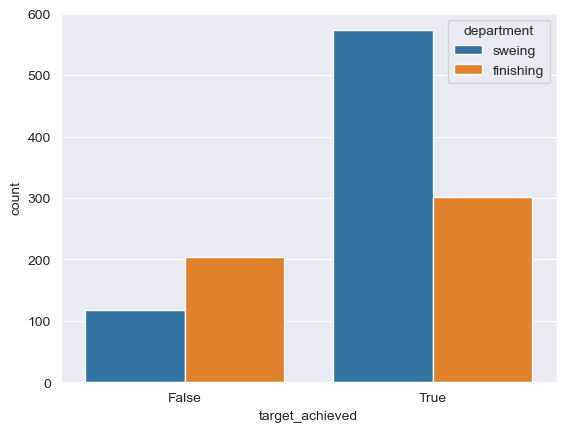

In [31]:
sns.countplot(data=df,
            hue='department',
            x='target_achieved')

Dari total 1197 data yang ada, target yang dicapai sebanyak 875 kali diamana 573 kali untuk department sewing dan 302 kali untuk department finishing

In [32]:
df.to_csv('garment.csv')

## Data Preprocessing

### Date Feature Handling

In [33]:
# Convert the date column to datetime data type
df['date'] = pd.to_datetime(df['date'])

# Extract relevant features from the date column
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

In [34]:
df = df.drop(['date'],axis=1)

## More Visualization

### Productivity Trends by Day of the Week

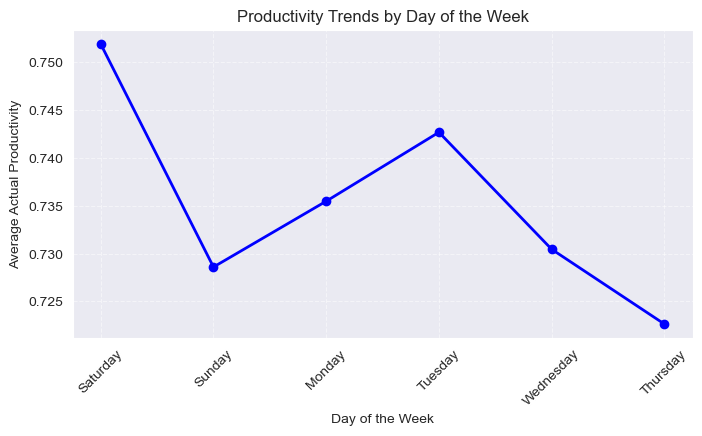

In [35]:
# Convert the 'day' column to a categorical data type with the correct order
df['day'] = pd.Categorical(df['day'], categories=['Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday'], ordered=True)

# Calculate average productivity by day of the week
day_avg_productivity = df.groupby('day')['actual_productivity'].mean()

# Set the figure size
plt.figure(figsize=(8, 4))

# Create a line plot with markers
plt.plot(day_avg_productivity.index, day_avg_productivity.values, marker='o', color='blue', linestyle='-', linewidth=2)

# Customize the plot
plt.xlabel('Day of the Week')
plt.ylabel('Average Actual Productivity')
plt.title('Productivity Trends by Day of the Week')
plt.grid(True, linestyle='--', alpha=0.5)

# Adjust the x-axis tick labels rotation for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

Dalam waktu bekerja tersebut, hari sabtu menjadi hari dengan rata-rata produktivias tertinggi, dan kamis menjadi yang terendah

### Productivity by Month

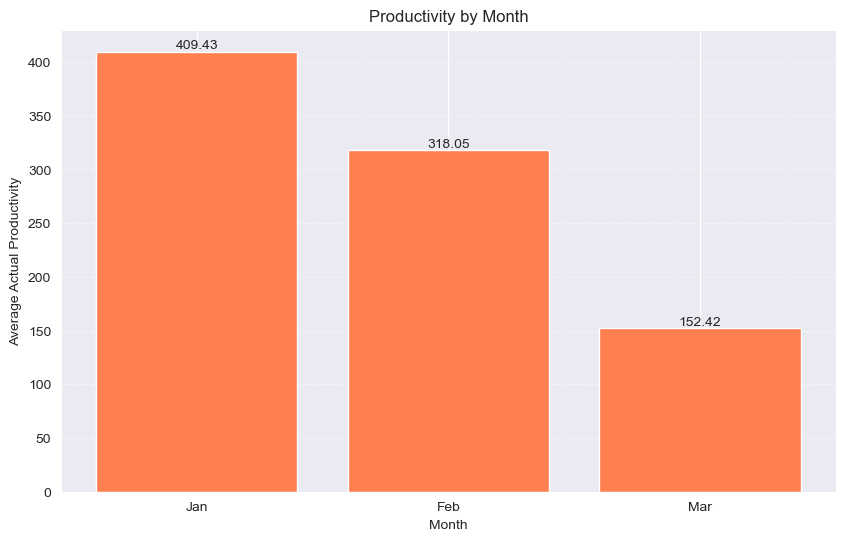

In [36]:
# Calculate the average productivity for each month
month_avg_productivity = df.groupby('month')['actual_productivity'].sum()

# Set the figure size and create a bar plot
plt.figure(figsize=(10, 6))
bars = plt.bar(month_avg_productivity.index, month_avg_productivity.values, color='coral')

# Add value annotations to the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom')

# Customize the plot
plt.xlabel('Month')
plt.ylabel('Average Actual Productivity')
plt.title('Productivity by Month')
plt.xticks(range(1, 4), ['Jan', 'Feb', 'Mar'])
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Show the plot
plt.show()

Dalam kurun waktu 3 bulan ini, pabrik mengalami penurunan rata-rata produksi aktual

### Productivity by Quarter

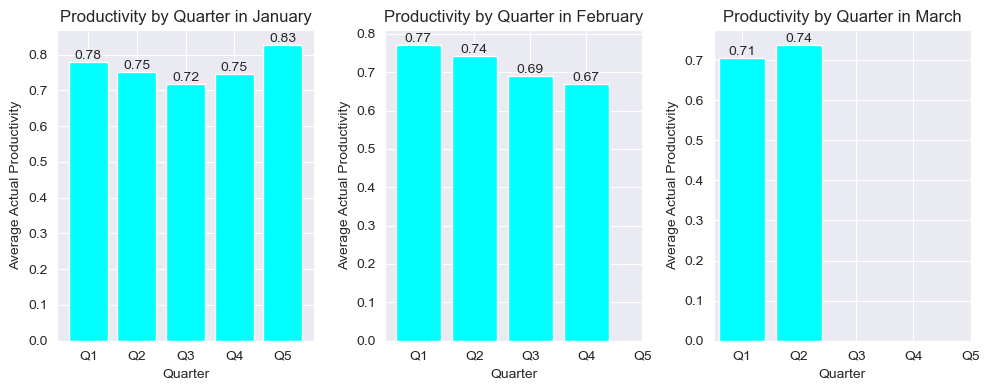

In [37]:
# Define the months of interest
months_of_interest = [1, 2, 3]  # January, February, and March

# Set the figure size
plt.figure(figsize=(10, 4))

# Iterate over the months of interest
for idx, month in enumerate(months_of_interest):
    # Filter the data for the current month
    month_data = df[df['month'] == month]

    # Calculate the average productivity for each quarter in the current month
    quarter_avg_productivity = month_data.groupby('quarter')['actual_productivity'].mean()

    # Plot the average productivity by quarter for the current month
    plt.subplot(1, len(months_of_interest), idx+1)
    bars = plt.bar(quarter_avg_productivity.index, quarter_avg_productivity.values, color='aqua')
    plt.xlabel('Quarter')
    plt.ylabel('Average Actual Productivity')
    plt.title('Productivity by Quarter in {}'.format(pd.Timestamp(month=month, day=1, year=2023).strftime('%B')))
    plt.xticks(range(0, 5), ['Q1', 'Q2', 'Q3', 'Q4', 'Q5'])

    # Add values on top of each bar
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height,
                 '{:.2f}'.format(height),
                 ha='center', va='bottom')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()

- Terjadi peningkatan prouksi pada quarter setiap pergantian bulan.
- Productivity yang terjadi pada bulan februari sangat jelek, mengalami penurunan dari awal hingga akhir.
- Tren produktivity meningkat pada quarter awal bulan maret

## Back to Preprocessing

### Remove Outlier

In [38]:
print(f'Jumlah Baris Sebelum Outlier Dihapus: {len(df)}')
filtered_entries = np.array([True] * len(df))
for col in['wip','incentive','idle_time','idle_men']:
    
    q1=df[col].quantile(0.25)
    q3=df[col].quantile(0.75)
    iqr=q3-q1

    min_IQR = q1 - (1.5 * iqr)
    max_IQR = q3 + (1.5 * iqr)

    filtered_entries=((df[col]>=min_IQR) & (df[col]<=max_IQR)) & filtered_entries
    df=df[filtered_entries]

print(f'Jumlah Baris Sebelum Outlier Dihapus: {len(df)}')

Jumlah Baris Sebelum Outlier Dihapus: 1197
Jumlah Baris Sebelum Outlier Dihapus: 629


C:\Users\Acer\AppData\Local\Temp\ipykernel_15220\343558771.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df=df[filtered_entries]
C:\Users\Acer\AppData\Local\Temp\ipykernel_15220\343558771.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df=df[filtered_entries]
C:\Users\Acer\AppData\Local\Temp\ipykernel_15220\343558771.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df=df[filtered_entries]


### Remove Multicolliear Features

In [39]:
df = df.drop(columns=['over_time', 'no_of_workers'], axis=1)

### Check Duplicated Data

In [40]:
df.duplicated().sum()

0

### Handling Null Value

In [41]:
df.isnull().sum()

quarter                  0
department               0
day                      0
team                     0
targeted_productivity    0
smv                      0
wip                      0
incentive                0
idle_time                0
idle_men                 0
no_of_style_change       0
actual_productivity      0
target_achieved          0
year                     0
month                    0
dtype: int64

In [42]:
df['wip'] = df['wip'].fillna(0)

Data Null pada 'wip' diisi 0 karena pada Work in progres hanya ada pada department sewing, karena untuk melakukan finishing harus menyelesaikan tahapan sewing terlebih dahulu.

Terdapat data null pada fitur ini, dan semua null value nya ada pada department finishing. Maka, null value pada wip diganti dengan 0.

## Encoding

### Label Encoding

In [43]:
# Label Encoding for feature with 2 unique value

from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df[['no_of_style_change']] = df[['no_of_style_change']].apply(LabelEncoder().fit_transform)

### One Hot Encoding

In [44]:
categorical1 = ['quarter', 'department', 'day', 'team']

In [45]:
for cat in categorical1:
    onehots = pd.get_dummies(df[cat], prefix=cat)
    df = df.join(onehots)

In [46]:
df = df.drop(['quarter', 'department', 'day', 'team'],axis=1)
df.head(5)

,targeted_productivity,smv,wip,incentive,idle_time,idle_men,no_of_style_change,actual_productivity,target_achieved,year,...,team_3,team_4,team_5,team_6,team_7,team_8,team_9,team_10,team_11,team_12
0,0.8,26.16,1108.0,98,0.0,0,0,0.940725,True,2015,...,0,0,0,0,0,1,0,0,0,0
2,0.8,11.41,968.0,50,0.0,0,0,0.800570,True,2015,...,0,0,0,0,0,0,0,0,1,0
3,0.8,11.41,968.0,50,0.0,0,0,0.800570,True,2015,...,0,0,0,0,0,0,0,0,0,1
4,0.8,25.90,1170.0,50,0.0,0,0,0.800382,True,2015,...,0,0,0,1,0,0,0,0,0,0
5,0.8,25.90,984.0,38,0.0,0,0,0.800125,True,2015,...,0,0,0,0,1,0,0,0,0,0


In [47]:
df_clf = df.copy()

In [48]:
df = df.drop(['actual_productivity'],axis=1)

### Split Data

In [49]:
X = df.drop(columns='target_achieved') 
y = df['target_achieved'] 

print("Label shape:")
print(y.shape)

print("Features shape:")
print(X.shape)

Label shape:
(629,)
Features shape:
(629, 33)


# Modelling

In [50]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

### Scalling Data

In [51]:
from sklearn.preprocessing import MinMaxScaler
 
# scale features
scaler = MinMaxScaler()
model=scaler.fit(X_train)
X_train_scaled=model.transform(X_train)
 
X_test_scaled = scaler.transform(X_test)

In [52]:
from sklearn.preprocessing import MinMaxScaler
 
# scale features
scaler = MinMaxScaler()
model=scaler.fit(X)
X_scaled=model.transform(X)

In [53]:
X_combined = np.concatenate((X_train_scaled, X_test_scaled), axis=0)

## Decision Tree

In [54]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix

# Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_scaled, y_train)

# Predict on train and test sets
dt_y_train_pred = dt_model.predict(X_train_scaled)
dt_y_pred = dt_model.predict(X_test_scaled)

# Calculate scores on train set
dt_train_score = dt_model.score(X_train_scaled, y_train)
dt_precision_train = precision_score(y_train, dt_y_train_pred) * 100
dt_recall_train = recall_score(y_train, dt_y_train_pred) * 100
dt_f1_train = f1_score(y_train, dt_y_train_pred) * 100
dt_roc_auc_train = roc_auc_score(y_train, dt_y_train_pred) * 100

# Calculate scores on test set
dt_test_score = dt_model.score(X_test_scaled, y_test)
dt_precision_test = precision_score(y_test, dt_y_pred) * 100
dt_recall_test = recall_score(y_test, dt_y_pred) * 100
dt_f1_test = f1_score(y_test, dt_y_pred) * 100
dt_roc_auc_test = roc_auc_score(y_test, dt_y_pred) * 100

# Print scores for Decision Tree
print("Decision Tree:")
print("Training score: {:.2f}%".format(dt_train_score * 100))
print("Precision (train): {:.2f}%".format(dt_precision_train))
print("Recall (train): {:.2f}%".format(dt_recall_train))
print("F1 score (train): {:.2f}%".format(dt_f1_train))
print("ROC AUC score (train): {:.2f}%".format(dt_roc_auc_train))
print("------------")
print("Testing score: {:.2f}%".format(dt_test_score * 100))
print("Precision (test): {:.2f}%".format(dt_precision_test))
print("Recall (test): {:.2f}%".format(dt_recall_test))
print("F1 score (test): {:.2f}%".format(dt_f1_test))
print("ROC AUC score (test): {:.2f}%".format(dt_roc_auc_test))

Decision Tree:
Training score: 100.00%
Precision (train): 100.00%
Recall (train): 100.00%
F1 score (train): 100.00%
ROC AUC score (train): 100.00%
------------
Testing score: 85.71%
Precision (test): 91.67%
Recall (test): 91.67%
F1 score (test): 91.67%
ROC AUC score (test): 70.83%


In [55]:
test_report = classification_report(y_true=y_test, y_pred=dt_model.predict(X_test_scaled))
print(test_report)

              precision    recall  f1-score   support

       False       0.50      0.50      0.50        18
        True       0.92      0.92      0.92       108

    accuracy                           0.86       126
   macro avg       0.71      0.71      0.71       126
weighted avg       0.86      0.86      0.86       126



## RandomForest

In [56]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Predict on train and test sets
rf_y_train_pred = rf_model.predict(X_train_scaled)
rf_y_pred = rf_model.predict(X_test_scaled)

# Calculate scores on train set
rf_train_score = rf_model.score(X_train_scaled, y_train)
rf_precision_train = precision_score(y_train, rf_y_train_pred) * 100
rf_recall_train = recall_score(y_train, rf_y_train_pred) * 100
rf_f1_train = f1_score(y_train, rf_y_train_pred) * 100
rf_roc_auc_train = roc_auc_score(y_train, rf_y_train_pred) * 100

# Calculate scores on test set
rf_test_score = rf_model.score(X_test_scaled, y_test)
rf_precision_test = precision_score(y_test, rf_y_pred) * 100
rf_recall_test = recall_score(y_test, rf_y_pred) * 100
rf_f1_test = f1_score(y_test, rf_y_pred) * 100
rf_roc_auc_test = roc_auc_score(y_test, rf_y_pred) * 100

# Print scores for Random Forest
print("Random Forest:")
print("Training score: {:.2f}%".format(rf_train_score * 100))
print("Precision (train): {:.2f}%".format(rf_precision_train))
print("Recall (train): {:.2f}%".format(rf_recall_train))
print("F1 score (train): {:.2f}%".format(rf_f1_train))
print("ROC AUC score (train): {:.2f}%".format(rf_roc_auc_train))
print("------------")
print("Testing score: {:.2f}%".format(rf_test_score * 100))
print("Precision (test): {:.2f}%".format(rf_precision_test))
print("Recall (test): {:.2f}%".format(rf_recall_test))
print("F1 score (test): {:.2f}%".format(rf_f1_test))
print("ROC AUC score (test): {:.2f}%".format(rf_roc_auc_test))

Random Forest:
Training score: 100.00%
Precision (train): 100.00%
Recall (train): 100.00%
F1 score (train): 100.00%
ROC AUC score (train): 100.00%
------------
Testing score: 84.13%
Precision (test): 86.07%
Recall (test): 97.22%
F1 score (test): 91.30%
ROC AUC score (test): 51.39%


In [57]:
test_report = classification_report(y_true=y_test, y_pred=rf_model.predict(X_test_scaled))
print(test_report)

              precision    recall  f1-score   support

       False       0.25      0.06      0.09        18
        True       0.86      0.97      0.91       108

    accuracy                           0.84       126
   macro avg       0.56      0.51      0.50       126
weighted avg       0.77      0.84      0.80       126



## KNeighbors

In [58]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

# K-Nearest Neighbors
knn_model = KNeighborsClassifier()
knn_model.fit(X_train_scaled, y_train)

# Predict on train and test sets
knn_y_train_pred = knn_model.predict(X_train_scaled)
knn_y_pred = knn_model.predict(X_test_scaled)

# Calculate scores on train set
knn_train_score = knn_model.score(X_train_scaled, y_train)
knn_precision_train = precision_score(y_train, knn_y_train_pred) * 100
knn_recall_train = recall_score(y_train, knn_y_train_pred) * 100
knn_f1_train = f1_score(y_train, knn_y_train_pred) * 100
knn_roc_auc_train = roc_auc_score(y_train, knn_y_train_pred) * 100

# Calculate scores on test set
knn_test_score = knn_model.score(X_test_scaled, y_test)
knn_precision_test = precision_score(y_test, knn_y_pred) * 100
knn_recall_test = recall_score(y_test, knn_y_pred) * 100
knn_f1_test = f1_score(y_test, knn_y_pred) * 100
knn_roc_auc_test = roc_auc_score(y_test, knn_y_pred) * 100

# Print scores for K-Nearest Neighbors
print("K-Nearest Neighbors:")
print("Training score: {:.2f}%".format(knn_train_score * 100))
print("Precision (train): {:.2f}%".format(knn_precision_train))
print("Recall (train): {:.2f}%".format(knn_recall_train))
print("F1 score (train): {:.2f}%".format(knn_f1_train))
print("ROC AUC score (train): {:.2f}%".format(knn_roc_auc_train))
print("------------")
print("Testing score: {:.2f}%".format(knn_test_score * 100))
print("Precision (test): {:.2f}%".format(knn_precision_test))
print("Recall (test): {:.2f}%".format(knn_recall_test))
print("F1 score (test): {:.2f}%".format(knn_f1_test))
print("ROC AUC score (test): {:.2f}%".format(knn_roc_auc_test))

K-Nearest Neighbors:
Training score: 88.87%
Precision (train): 89.05%
Recall (train): 99.06%
F1 score (train): 93.79%
ROC AUC score (train): 65.32%
------------
Testing score: 84.13%
Precision (test): 86.07%
Recall (test): 97.22%
F1 score (test): 91.30%
ROC AUC score (test): 51.39%


In [59]:
test_report = classification_report(y_test,knn_y_pred)
print(test_report)

              precision    recall  f1-score   support

       False       0.25      0.06      0.09        18
        True       0.86      0.97      0.91       108

    accuracy                           0.84       126
   macro avg       0.56      0.51      0.50       126
weighted avg       0.77      0.84      0.80       126



## Logistic Regression

In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

# Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(X_train_scaled, y_train)

# Predict on train and test sets
lr_y_train_pred = lr_model.predict(X_train_scaled)
lr_y_pred = lr_model.predict(X_test_scaled)

# Calculate scores on train set
lr_train_score = lr_model.score(X_train_scaled, y_train)
lr_precision_train = precision_score(y_train, lr_y_train_pred) * 100
lr_recall_train = recall_score(y_train, lr_y_train_pred) * 100
lr_f1_train = f1_score(y_train, lr_y_train_pred) * 100
lr_roc_auc_train = roc_auc_score(y_train, lr_y_train_pred) * 100

# Calculate scores on test set
lr_test_score = lr_model.score(X_test_scaled, y_test)
lr_precision_test = precision_score(y_test, lr_y_pred) * 100
lr_recall_test = recall_score(y_test, lr_y_pred) * 100
lr_f1_test = f1_score(y_test, lr_y_pred) * 100
lr_roc_auc_test = roc_auc_score(y_test, lr_y_pred) * 100

# Print scores for Logistic Regression
print("Logistic Regression:")
print("Training score: {:.2f}%".format(lr_train_score * 100))
print("Precision (train): {:.2f}%".format(lr_precision_train))
print("Recall (train): {:.2f}%".format(lr_recall_train))
print("F1 score (train): {:.2f}%".format(lr_f1_train))
print("ROC AUC score (train): {:.2f}%".format(lr_roc_auc_train))
print("------------")
print("Testing score: {:.2f}%".format(lr_test_score * 100))
print("Precision (test): {:.2f}%".format(lr_precision_test))
print("Recall (test): {:.2f}%".format(lr_recall_test))
print("F1 score (test): {:.2f}%".format(lr_f1_test))
print("ROC AUC score (test): {:.2f}%".format(lr_roc_auc_test))


Logistic Regression:
Training score: 88.87%
Precision (train): 89.72%
Recall (train): 98.13%
F1 score (train): 93.74%
ROC AUC score (train): 67.48%
------------
Testing score: 83.33%
Precision (test): 86.55%
Recall (test): 95.37%
F1 score (test): 90.75%
ROC AUC score (test): 53.24%


In [61]:
test_report = classification_report(y_test,lr_y_pred)
print(test_report)

              precision    recall  f1-score   support

       False       0.29      0.11      0.16        18
        True       0.87      0.95      0.91       108

    accuracy                           0.83       126
   macro avg       0.58      0.53      0.53       126
weighted avg       0.78      0.83      0.80       126



## SVM

In [62]:
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

# SVM
svm_model = SVC(kernel='linear')
svm_model.fit(X_train_scaled, y_train)

# Predict on train and test sets
svm_y_train_pred = svm_model.predict(X_train_scaled)
svm_y_pred = svm_model.predict(X_test_scaled)

# Calculate scores on train set
svm_train_score = svm_model.score(X_train_scaled, y_train)
svm_precision_train = precision_score(y_train, svm_y_train_pred) * 100
svm_recall_train = recall_score(y_train, svm_y_train_pred) * 100
svm_f1_train = f1_score(y_train, svm_y_train_pred) * 100
svm_roc_auc_train = roc_auc_score(y_train, svm_y_train_pred) * 100

# Calculate scores on test set
svm_test_score = svm_model.score(X_test_scaled, y_test)
svm_precision_test = precision_score(y_test, svm_y_pred) * 100
svm_recall_test = recall_score(y_test, svm_y_pred) * 100
svm_f1_test = f1_score(y_test, svm_y_pred) * 100
svm_roc_auc_test = roc_auc_score(y_test, svm_y_pred) * 100

# Print scores for SVM
print("SVM:")
print("Training score: {:.2f}%".format(svm_train_score * 100))
print("Precision (train): {:.2f}%".format(svm_precision_train))
print("Recall (train): {:.2f}%".format(svm_recall_train))
print("F1 score (train): {:.2f}%".format(svm_f1_train))
print("ROC AUC score (train): {:.2f}%".format(svm_roc_auc_train))
print("------------")
print("Testing score: {:.2f}%".format(svm_test_score * 100))
print("Precision (test): {:.2f}%".format(svm_precision_test))
print("Recall (test): {:.2f}%".format(svm_recall_test))
print("F1 score (test): {:.2f}%".format(svm_f1_test))
print("ROC AUC score (test): {:.2f}%".format(svm_roc_auc_test))

SVM:
Training score: 91.05%
Precision (train): 91.89%
Recall (train): 98.13%
F1 score (train): 94.90%
ROC AUC score (train): 74.72%
------------
Testing score: 85.71%
Precision (test): 88.79%
Recall (test): 95.37%
F1 score (test): 91.96%
ROC AUC score (test): 61.57%


In [63]:
test_report = classification_report(y_test,svm_y_pred)
print(test_report)

              precision    recall  f1-score   support

       False       0.50      0.28      0.36        18
        True       0.89      0.95      0.92       108

    accuracy                           0.86       126
   macro avg       0.69      0.62      0.64       126
weighted avg       0.83      0.86      0.84       126



## SMOTE

In [65]:
# Overampling with smote
from imblearn.over_sampling import SMOTE 
from imblearn import over_sampling
X_over_smote, y_over_smote = over_sampling.SMOTE().fit_resample(X_train_scaled, y_train)

In [66]:
y_over_smote.value_counts()

True     427
False    427
Name: target_achieved, dtype: int64

## Hyperparameter Tuning

### Decision Tree

#### Recall

In [67]:
# hyperparameter tuning
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}

dt_gridcv = GridSearchCV(dt_model, params, cv=10, scoring='recall')
dt_gridcv.fit(X_over_smote, y_over_smote)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             scoring='recall')

In [68]:
# the compact results
cv_result = pd.DataFrame(dt_gridcv.cv_results_)
retain_cols = ['params','mean_test_score','rank_test_score']
cv_result[retain_cols]

,params,mean_test_score,rank_test_score
0,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.845293,31
1,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.842968,32
2,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.842968,32
3,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.788926,43
4,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.840532,34
5,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.925028,4
6,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.917996,5
7,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.906257,8
8,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.791196,42
9,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.758527,47


In [69]:
print(dt_gridcv.best_params_)

{'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 10}


In [70]:
top_5 = cv_result[retain_cols].sort_values(by='rank_test_score').head(5)
top_5

,params,mean_test_score,rank_test_score
31,"{'criterion': 'entropy', 'max_depth': 3, 'min_...",0.936822,1
30,"{'criterion': 'entropy', 'max_depth': 3, 'min_...",0.932171,2
32,"{'criterion': 'entropy', 'max_depth': 3, 'min_...",0.925083,3
5,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.925028,4
6,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.917996,5


In [71]:
# Get the best hyperparameters
best_params = dt_gridcv.best_params_

# Create a new Random Forest model with the best parameters
best_dt_model = DecisionTreeClassifier(**best_params, random_state=42)

# Fit the model on the training data
best_dt_model.fit(X_over_smote, y_over_smote)

# Make predictions on the test data
y_pred = best_dt_model.predict(X_test_scaled)

# Evaluate the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.62      0.44      0.52        18
        True       0.91      0.95      0.93       108

    accuracy                           0.88       126
   macro avg       0.76      0.70      0.72       126
weighted avg       0.87      0.88      0.87       126



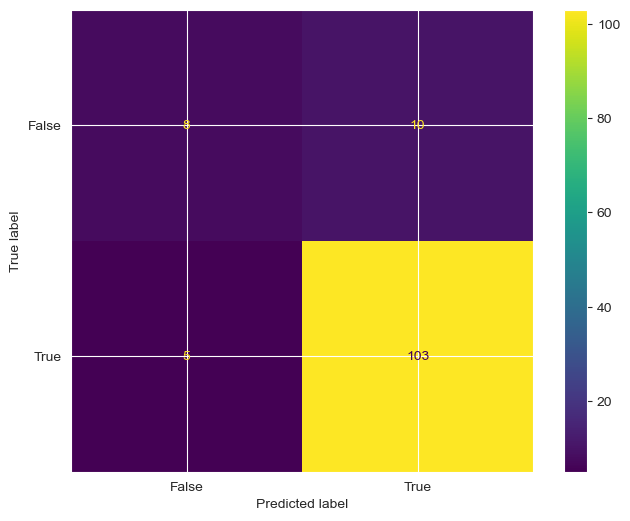

In [72]:
# plotting confusion matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(8,6))
y_pred = dt_gridcv.best_estimator_.predict(X_test_scaled)

cm = confusion_matrix(y_test, y_pred, labels=dt_gridcv.best_estimator_.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=dt_gridcv.best_estimator_.classes_)
disp.plot(ax=ax)
plt.show()

## Random Forest

In [74]:
rf_params = {'bootstrap': [True, False],
 'max_depth': [10, 30, 50, 70, 90],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [2, 4],
 'min_samples_split': [2, 5],
 'n_estimators': [20,40,60,80,100]}

rf_gridcv = GridSearchCV(rf_model, rf_params, cv=10, scoring='recall')
rf_gridcv.fit(X_over_smote, y_over_smote)

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=42),
             param_grid={'bootstrap': [True, False],
                         'max_depth': [10, 30, 50, 70, 90],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [2, 4],
                         'min_samples_split': [2, 5],
                         'n_estimators': [20, 40, 60, 80, 100]},
             scoring='recall')

In [75]:
# the compact results
cv_result = pd.DataFrame(rf_gridcv.cv_results_)
retain_cols = ['params','mean_test_score','rank_test_score']
cv_result[retain_cols]

,params,mean_test_score,rank_test_score
0,"{'bootstrap': True, 'max_depth': 10, 'max_feat...",0.910908,383
1,"{'bootstrap': True, 'max_depth': 10, 'max_feat...",0.922757,263
2,"{'bootstrap': True, 'max_depth': 10, 'max_feat...",0.925083,239
3,"{'bootstrap': True, 'max_depth': 10, 'max_feat...",0.920432,273
4,"{'bootstrap': True, 'max_depth': 10, 'max_feat...",0.918051,287
...,...,...,...
395,"{'bootstrap': False, 'max_depth': 90, 'max_fea...",0.925138,187
396,"{'bootstrap': False, 'max_depth': 90, 'max_fea...",0.929790,99
397,"{'bootstrap': False, 'max_depth': 90, 'max_fea...",0.925138,187
398,"{'bootstrap': False, 'max_depth': 90, 'max_fea...",0.925138,187


In [76]:
print(rf_gridcv.best_params_)

{'bootstrap': False, 'max_depth': 30, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 60}


In [77]:
top_5 = cv_result[retain_cols].sort_values(by='rank_test_score').head(5)
top_5

,params,mean_test_score,rank_test_score
242,"{'bootstrap': False, 'max_depth': 30, 'max_fea...",0.941417,1
345,"{'bootstrap': False, 'max_depth': 70, 'max_fea...",0.941417,1
325,"{'bootstrap': False, 'max_depth': 70, 'max_fea...",0.941417,1
322,"{'bootstrap': False, 'max_depth': 70, 'max_fea...",0.941417,1
362,"{'bootstrap': False, 'max_depth': 90, 'max_fea...",0.941417,1


In [78]:
# Get the best hyperparameters
best_params = rf_gridcv.best_params_

# Create a new Random Forest model with the best parameters
best_rf_model = RandomForestClassifier(**best_params, random_state=42)

# Fit the model on the training data
best_rf_model.fit(X_over_smote, y_over_smote)

# Make predictions on the test data
y_pred = best_rf_model.predict(X_test_scaled)

# Evaluate the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.55      0.33      0.41        18
        True       0.90      0.95      0.92       108

    accuracy                           0.87       126
   macro avg       0.72      0.64      0.67       126
weighted avg       0.85      0.87      0.85       126



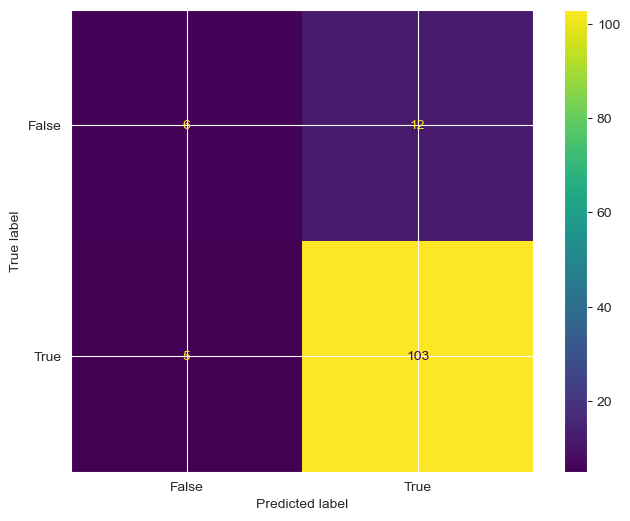

In [79]:
# plotting confusion matrix

fig, ax = plt.subplots(figsize=(8,6))
y_pred = rf_gridcv.best_estimator_.predict(X_test_scaled)

cm = confusion_matrix(y_test, y_pred, labels=rf_gridcv.best_estimator_.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=rf_gridcv.best_estimator_.classes_)
disp.plot(ax=ax)
plt.show()

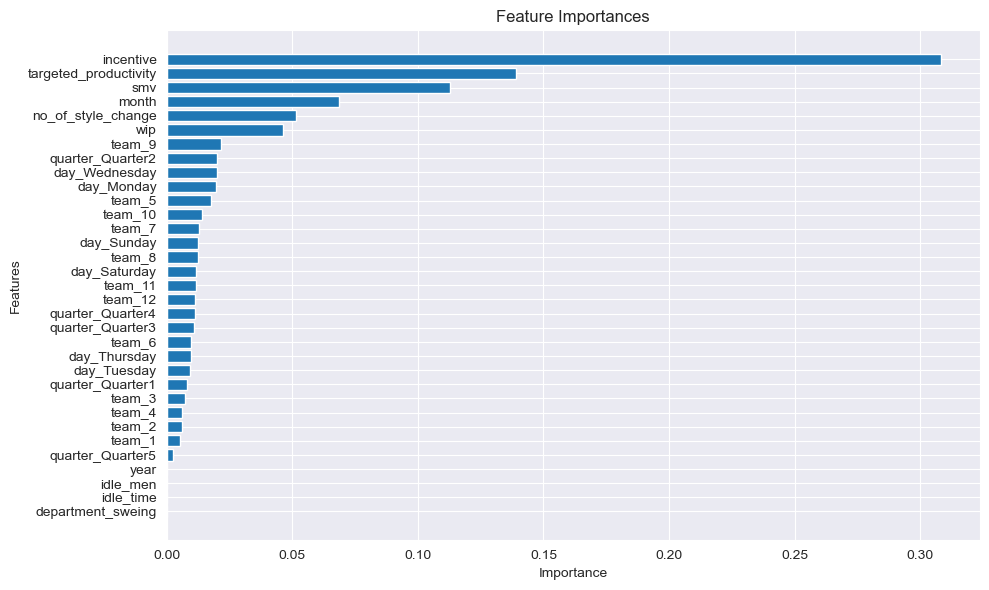

In [102]:
# Get the feature importances
feature_importances = best_rf_model.feature_importances_

# Sort the feature importances in ascending order
sorted_indices = np.argsort(feature_importances)
sorted_feature_importances = feature_importances[sorted_indices]

# Get the names of the features
feature_names = X_train.columns

# Plot the feature importances in an ascending horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_feature_importances)), sorted_feature_importances, align='center')
plt.yticks(range(len(sorted_feature_importances)), feature_names[sorted_indices])
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importances')
plt.tight_layout()
plt.show()

## KNN

In [81]:
knn_parameters = {
    'n_neighbors': (2,3,4,5,6,7,8)
}

knn_clf_gridcv = GridSearchCV(knn_model, knn_parameters, cv=10, scoring='recall')
knn_clf_gridcv.fit(X_over_smote, y_over_smote)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': (2, 3, 4, 5, 6, 7, 8)},
             scoring='recall')

In [82]:
# the compact results
cv_result = pd.DataFrame(knn_clf_gridcv.cv_results_)
retain_cols = ['params','mean_test_score','rank_test_score']
cv_result[retain_cols]

,params,mean_test_score,rank_test_score
0,{'n_neighbors': 2},0.482558,7
1,{'n_neighbors': 3},0.588261,2
2,{'n_neighbors': 4},0.489978,6
3,{'n_neighbors': 5},0.569324,3
4,{'n_neighbors': 6},0.527187,5
5,{'n_neighbors': 7},0.611351,1
6,{'n_neighbors': 8},0.566722,4


In [83]:
# Get the best hyperparameters
best_params = knn_clf_gridcv.best_params_

# Create a new Random Forest model with the best parameters
best_knn_model = KNeighborsClassifier(**best_params)

# Fit the model on the training data
best_knn_model.fit(X_over_smote, y_over_smote)

# Make predictions on the test data
y_pred = best_knn_model.predict(X_test_scaled)

# Evaluate the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.18      0.56      0.27        18
        True       0.88      0.56      0.69       108

    accuracy                           0.56       126
   macro avg       0.53      0.56      0.48       126
weighted avg       0.78      0.56      0.63       126



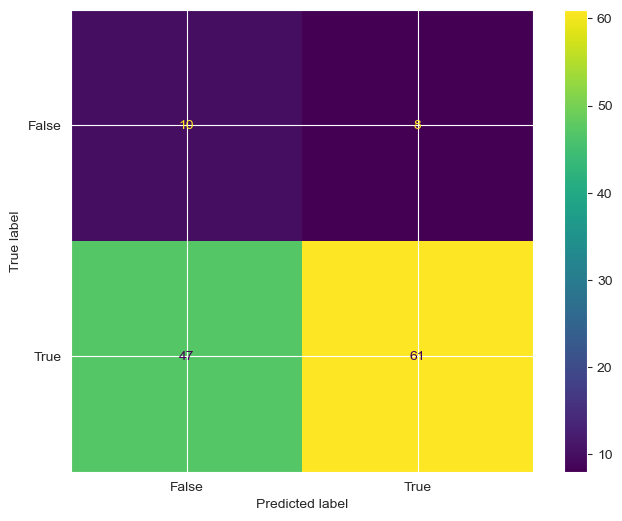

In [84]:
# plotting confusion matrix

fig, ax = plt.subplots(figsize=(8,6))
y_pred = knn_clf_gridcv.best_estimator_.predict(X_test_scaled)

cm = confusion_matrix(y_test, y_pred, labels=knn_clf_gridcv.best_estimator_.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=knn_clf_gridcv.best_estimator_.classes_)
disp.plot(ax=ax)
plt.show()

## SVM

In [85]:
svm_params = {'C': [0.1, 1, 10],
              'kernel': ['linear', 'rbf'],
              'gamma': ['scale', 'auto']}

svm_model = SVC(random_state=42)
svm_gridcv = GridSearchCV(svm_model, svm_params, cv=10, scoring='recall')
svm_gridcv.fit(X_over_smote, y_over_smote)

GridSearchCV(cv=10, estimator=SVC(random_state=42),
             param_grid={'C': [0.1, 1, 10], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf']},
             scoring='recall')

In [86]:
# the compact results
cv_result = pd.DataFrame(svm_gridcv.cv_results_)
retain_cols = ['params','mean_test_score','rank_test_score']
cv_result[retain_cols]

,params,mean_test_score,rank_test_score
0,"{'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}",0.812458,9
1,"{'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}",0.819657,8
2,"{'C': 0.1, 'gamma': 'auto', 'kernel': 'linear'}",0.812458,9
3,"{'C': 0.1, 'gamma': 'auto', 'kernel': 'rbf'}",0.608472,12
4,"{'C': 1, 'gamma': 'scale', 'kernel': 'linear'}",0.824197,6
5,"{'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}",0.903876,1
6,"{'C': 1, 'gamma': 'auto', 'kernel': 'linear'}",0.824197,6
7,"{'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}",0.789147,11
8,"{'C': 10, 'gamma': 'scale', 'kernel': 'linear'}",0.831285,4
9,"{'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}",0.901495,2


In [87]:
# Get the best hyperparameters
best_params_svm = svm_gridcv.best_params_

# Create a new SVM model with the best parameters
best_svm_model = SVC(**best_params_svm)

# Fit the model on the training data
best_svm_model.fit(X_over_smote, y_over_smote)

# Make predictions on the test data
y_pred_svm = best_svm_model.predict(X_test_scaled)

# Evaluate the model
print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm))

SVM Classification Report:
              precision    recall  f1-score   support

       False       0.33      0.28      0.30        18
        True       0.88      0.91      0.89       108

    accuracy                           0.82       126
   macro avg       0.61      0.59      0.60       126
weighted avg       0.80      0.82      0.81       126



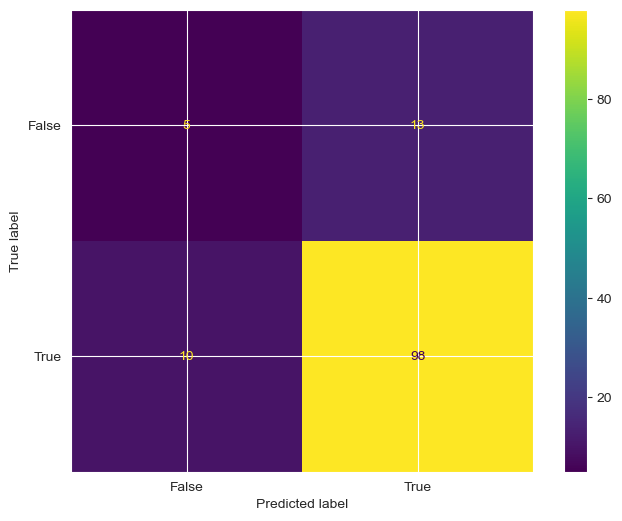

In [88]:
# plotting confusion matrix

fig, ax = plt.subplots(figsize=(8,6))
y_pred = svm_gridcv.best_estimator_.predict(X_test_scaled)

cm = confusion_matrix(y_test, y_pred, labels=knn_clf_gridcv.best_estimator_.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=knn_clf_gridcv.best_estimator_.classes_)
disp.plot(ax=ax)
plt.show()

## Logreg

In [89]:
lr_params = {'C': [0.1, 1, 10],
             'penalty': ['l1', 'l2']}

lr_model = LogisticRegression(random_state=42)
lr_gridcv = GridSearchCV(lr_model, lr_params, cv=10, scoring='recall')
lr_gridcv.fit(X_over_smote, y_over_smote)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, in _check_solver
    raise ValueError(
Valu

GridSearchCV(cv=10, estimator=LogisticRegression(random_state=42),
             param_grid={'C': [0.1, 1, 10], 'penalty': ['l1', 'l2']},
             scoring='recall')

In [90]:
# the compact results
cv_result = pd.DataFrame(lr_gridcv.cv_results_)
retain_cols = ['params','mean_test_score','rank_test_score']
cv_result[retain_cols]

,params,mean_test_score,rank_test_score
0,"{'C': 0.1, 'penalty': 'l1'}",NaN,4
1,"{'C': 0.1, 'penalty': 'l2'}",0.784607,3
2,"{'C': 1, 'penalty': 'l1'}",NaN,5
3,"{'C': 1, 'penalty': 'l2'}",0.831229,2
4,"{'C': 10, 'penalty': 'l1'}",NaN,6
5,"{'C': 10, 'penalty': 'l2'}",0.852381,1


In [91]:
# Get the best hyperparameters
best_params_lr = lr_gridcv.best_params_

# Create a new Logistic Regression model with the best parameters
best_lr_model = LogisticRegression(**best_params_lr)

# Fit the model on the training data
best_lr_model.fit(X_over_smote, y_over_smote)

# Make predictions on the test data
y_pred_lr = best_lr_model.predict(X_test_scaled)

# Evaluate the model
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_lr))

Logistic Regression Classification Report:
              precision    recall  f1-score   support

       False       0.42      0.72      0.53        18
        True       0.95      0.83      0.89       108

    accuracy                           0.82       126
   macro avg       0.68      0.78      0.71       126
weighted avg       0.87      0.82      0.84       126



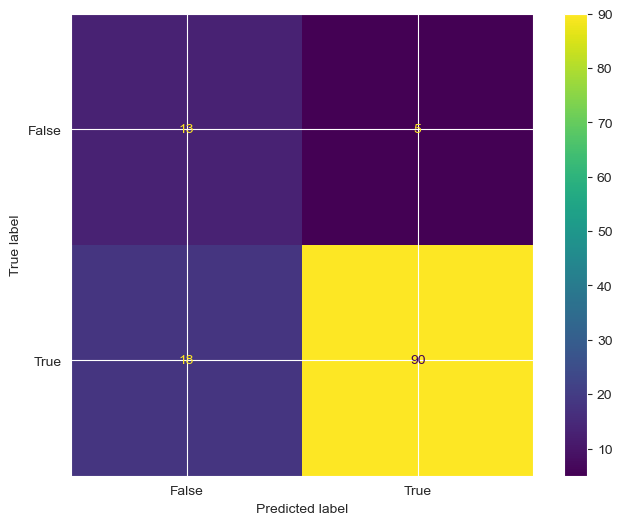

In [92]:
# plotting confusion matrix

fig, ax = plt.subplots(figsize=(8,6))
y_pred = lr_gridcv.best_estimator_.predict(X_test_scaled)

cm = confusion_matrix(y_test, y_pred, labels=knn_clf_gridcv.best_estimator_.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=knn_clf_gridcv.best_estimator_.classes_)
disp.plot(ax=ax)
plt.show()